In [1]:
import numpy as np
import util
import matplotlib.pyplot as plt
from linear_model import LinearModel


In [12]:
ds5_test_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds5_test.csv'
ds5_valid_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds5_valid.csv'
ds5_train_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds5_train.csv'

In [13]:
x_test, y_test = util.load_dataset(ds5_test_path, add_intercept=True)
x_train, y_train = util.load_dataset(ds5_train_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds5_valid_path, add_intercept=True)

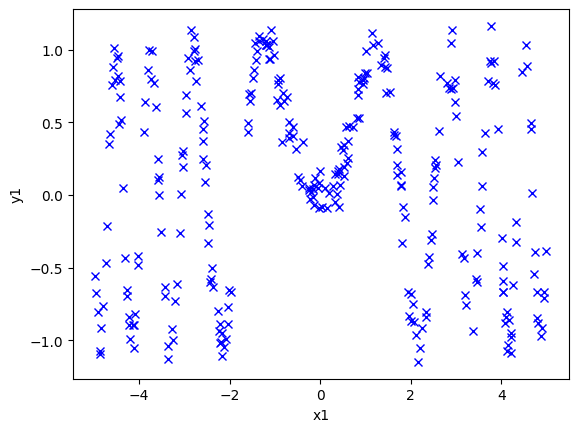

In [46]:
plt.xlabel("x1")
plt.ylabel("y1")
plt.plot(x_train[:,-1], y_train, "bx", linewidth =2)
plt.show()
## : selects every row, the ',' is used to differentiate between rows and columns, -1 selects last column
## this is done in order to not select the intercept term 

In [203]:
class LocalyWeightedRegression(LinearModel):
    def __init__(self, tau):
        super(LocalyWeightedRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None
    
    def fit(self, x, y):
        """Fit LWR by saving the training set.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        self.x = x
        self.y = y

    def predict(self, x):
        """ the weight matrix uses the X values from the training data and 
            the X values from the test data to find the weight penalising points that are further away
            the weight matrix is a diagonal matrix W=diag(w1,w2,w3,w4)
        """
        m,n = x.shape
        y_pred = np.zeros(m)
        """
        This loop goes through all m training points of x_training and gets a distance measuremtn 
        by taking the l2 distance of the query point x_test[i] to each training_x, the further away are penalised 
        Each test point has its own weight matrix with the diagonals representing the weight based on the l2 norm of each 
        traing point and that test point 
        the predictor for a point x_test[i] is theta*x_test[i], where theta is (X.T . W . X)^-1 . (X.T . W . y)
        found by minising the first derivative of the weighted least squares loss function.
        """

        for i in range(m):
            #a new weight matrix is calcualted at each iteration with again each diagional represeting the weight
            #of the ith traing example wrt to the x[i] test point.
            W = np.diag(np.exp(-np.sum((self.x - x[i])**2, axis=1) / (2 * self.tau**2)))
            ##axis needed as otherwise it would sum up the whole of the matrix to a scaler instead of just summing up 
            ##the rows i.e axis 1
            ##the dimensions of x[i] are automaticlly "broadcast" to mx2 the vector is copied m times 
            ##in order to match the dimensions of self.x.
            ## the intercept terms are also summed but because they are 0=(1-1) they have no effect 
            y_pred[i] = np.linalg.inv(self.x.T.dot(W).dot(self.x)).dot(self.x.T).dot(W).dot(self.y).T.dot(x[i])
        return y_pred
        


In [204]:
lreg = LocalyWeightedRegression(tau=0.5)
lreg.fit(x_train, y_train)
y_valid_predict = lreg.predict(x_valid)
mse = np.mean((y_test - y_valid_predict) ** 2)
print(f"MSE_Eval: {mse}")


MSE_Eval: 0.5323947782527436


In [217]:
lreg = LocalyWeightedRegression(tau=0.1)
lreg.fit(x_train, y_train)
y_valid_predict = lreg.predict(x_valid)
mse = np.mean((y_valid_predict-y_valid) ** 2)
print(f"MSE_Eval: {mse}")


MSE_Eval: 0.02422458937980397


In [219]:
lreg = LocalyWeightedRegression(tau=0.05)
lreg.fit(x_train, y_train)
y_valid_predict = lreg.predict(x_valid)
mse = np.mean((y_valid_predict-y_valid) ** 2)
print(f"MSE_Eval: {mse}")

MSE_Eval: 0.012400076150468477


In [221]:
lreg = LocalyWeightedRegression(tau=0.015)
lreg.fit(x_train, y_train)
y_valid_predict = lreg.predict(x_valid)
mse = np.mean((y_valid_predict-y_valid) ** 2)
print(f"MSE_Eval: {mse}")


MSE_Eval: 0.13882866981915717


Text(0, 0.5, 'y')

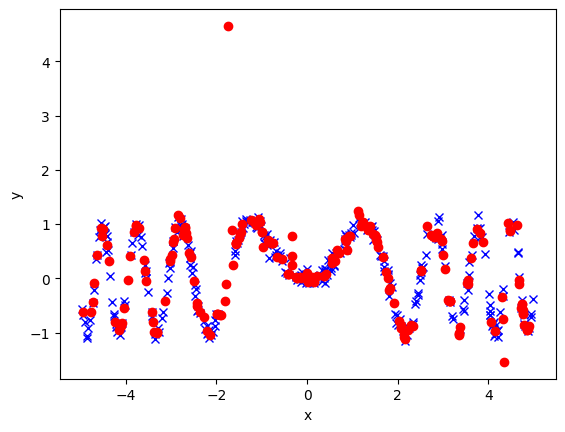

In [222]:
plt.plot(x_train[:,-1], y_train, 'bx', linewidth=2)
plt.plot(x_valid[:,-1], y_valid_predict, 'ro', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

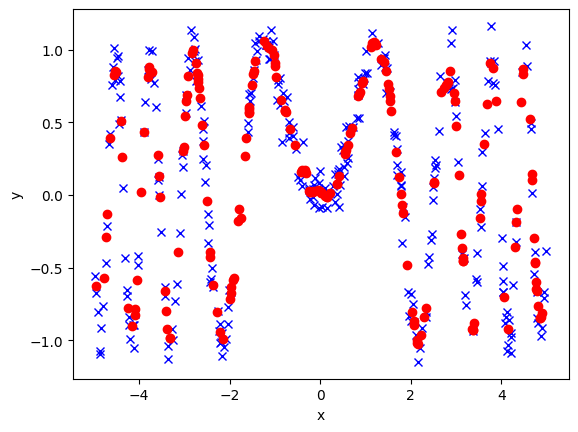

In [220]:
plt.plot(x_train[:,-1], y_train, 'bx', linewidth=2)
plt.plot(x_valid[:,-1], y_valid_predict, 'ro', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')